In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DATA_DIR = Path('..', 'data')

In [5]:
train_values = pd.read_csv(DATA_DIR / 'train_values.csv', index_col='building_id')
train_labels = pd.read_csv(DATA_DIR / 'train_labels.csv', index_col='building_id')

In [25]:
train_labels.groupby('damage_grade')['damage_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
damage_grade,,,,,,,,
1,25124.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,148259.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,87218.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


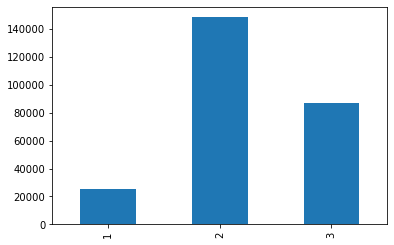

In [30]:
train_labels.damage_grade.value_counts().sort_index().plot.bar('Number of building with each damage grade')

In [44]:
selected_features = ['foundation_type', 
                     'area_percentage', 
                     'height_percentage',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_cement_mortar_stone']

train_values_subset = train_values[selected_features]

In [40]:
train_values_subset.head(10)

,foundation_type,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,has_superstructure_cement_mortar_stone
building_id,,,,,,
802906,r,6,5,2,t,0
28830,r,8,7,2,o,0
94947,r,5,5,2,t,0
590882,r,6,5,2,t,0
201944,r,8,9,3,t,0
333020,r,9,5,2,t,0
728451,r,3,4,2,n,0
475515,w,8,6,2,t,0
441126,r,8,6,2,t,0


/usr/local/miniconda3/envs/nepal-earthquake/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/miniconda3/envs/nepal-earthquake/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


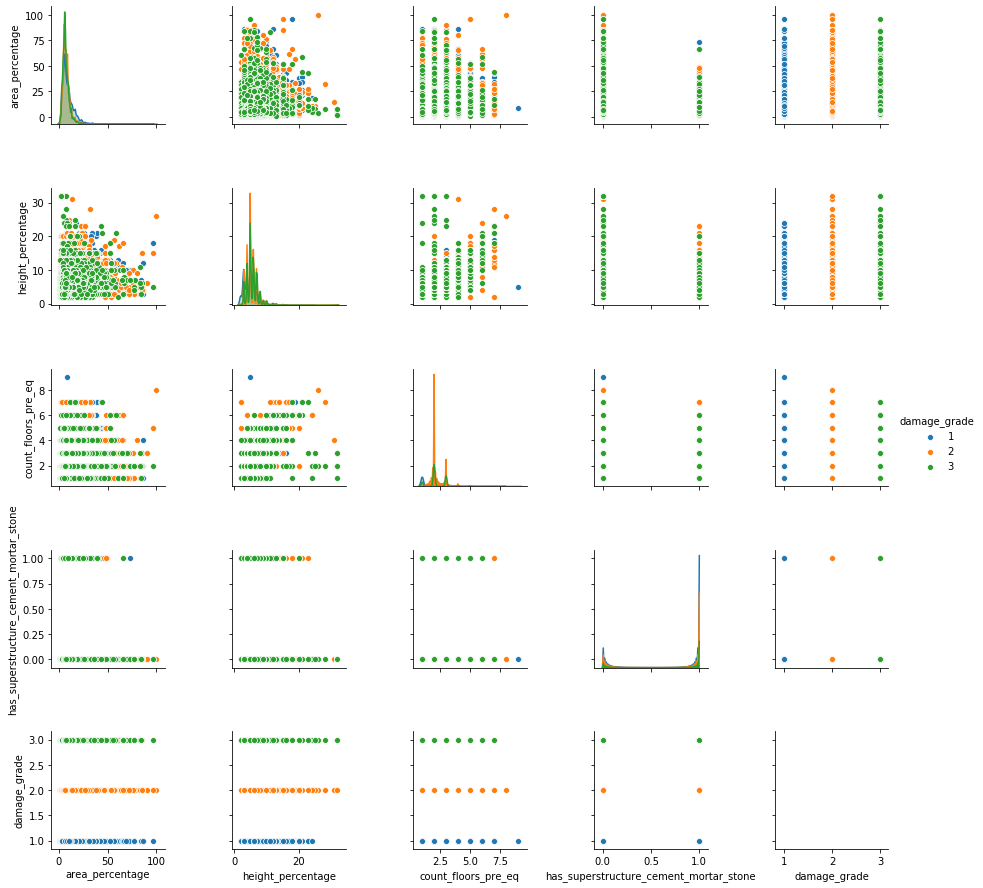

In [41]:
sns.pairplot(train_values_subset.join(train_labels), 
             hue='damage_grade')

In [47]:
train_values_subset = pd.get_dummies(train_values_subset)
train_values_subset

,area_percentage,height_percentage,count_floors_pre_eq,has_superstructure_cement_mortar_stone,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t
building_id,,,,,,,,,,,,
802906,6,5,2,0,0,0,1,0,0,0,0,1
28830,8,7,2,0,0,0,1,0,0,0,1,0
94947,5,5,2,0,0,0,1,0,0,0,0,1
590882,6,5,2,0,0,0,1,0,0,0,0,1
201944,8,9,3,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
688636,6,3,1,0,0,0,1,0,0,1,0,0
669485,6,5,2,0,0,0,1,0,0,0,0,1
602512,6,7,3,0,0,0,1,0,0,0,0,1
